Advanced: Animations
============================

**NOTE:** this tutorial may take a while to load in a browser as there are many embedded animations and also takes significant time to run and create all animations.

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.3 installed (uncomment this line if running in an online notebook session such as colab).

In [1]:
#!pip install -I "phoebe>=2.3,<2.4"

In [2]:
import phoebe
from phoebe import u # units
import numpy as np
import matplotlib.pyplot as plt

logger = phoebe.logger()

b = phoebe.default_binary()

In [3]:
times = np.linspace(0,1,51)

In [4]:
b.add_dataset('lc', compute_times=times, dataset='lc01')

<ParameterSet: 42 parameters | contexts: compute, constraint, figure, dataset>

In [5]:
b.add_dataset('orb', compute_times=times, dataset='orb01')

<ParameterSet: 8 parameters | contexts: compute, constraint, figure, dataset>

In [6]:
b.add_dataset('mesh', compute_times=times, dataset='mesh01', columns=['teffs'])

<ParameterSet: 8 parameters | contexts: compute, constraint, dataset>

In [7]:
b.run_compute(irrad_method='none')

<ParameterSet: 529 parameters | kinds: lc, orb, mesh>

Default Animations
-------------------------

By passing `animate=True` to [b.show()](../api/phoebe.parameters.ParameterSet.show.md), [b.savefig()](../api/phoebe.parameters.ParameterSet.savefig.md), or the final call to [b.plot()](../api/phoebe.parameters.ParameterSet.plot.md) along with `save=filename` or `show=True` will create an animation instead of a static plot.

Alternatively, you can call `afig.animate()` on the returned afig object returned by [b.plot()](../api/phoebe.parameters.ParameterSet.plot.md).

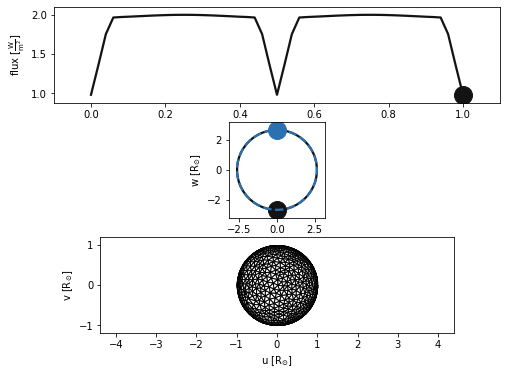

In [8]:
afig, mplanim = b.plot(y={'orb': 'ws'}, 
                       animate=True, save='animations_1.gif', save_kwargs={'writer': 'imagemagick'})

![animation](animations_1.gif)

Note that like the rest of the examples below, this is simply the animated version of the exact same call to plot

Providing Times
-------------------

To override the default times explained above, pass a list or array to the times keyword.  For synthetic models, highlight mode will be enabled by default and the provided time does not need to be one that is computed - the value will be interpolated if it is not.  However, for plotting meshes, the exact time must be stored in the synthetic meshes or they will not be drawn.

This is especially usefully in cases where you may not want to repeat the first and last frame for a looping gif, or where you want a smoother animation by interpolation.  In this example we'll plot all but the last time so that the loop doesn't have a repeated frame.

In this example, times[:-1:2] means skip the last time and only use every-other time.

This option is not available from run_compute - a frame will be drawn for each computed time.

/home/kyle/.local/lib/python3.7/site-packages/phoebe/parameters/parameters.py:3916: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif current_value in ['time', 'times'] and 'residuals' in kwargs.values():


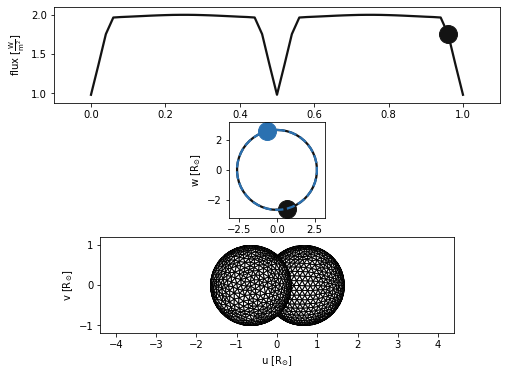

In [9]:
afig, mplanim = b.plot(y={'orb': 'ws'},
                       times=times[:-1:2], animate=True, save='animations_2.gif', save_kwargs={'writer': 'imagemagick'})

![animation](animations_2.gif)

Plotting Options
----------------------

By default, time highlighting is turned on.  See the [plotting tutorial](plotting) for details on 'highlight' and 'uncover' options.

Any additional arguments (colors, linestyle, etc) are passed to the plot call for EACH frame and for EVERY plotting call.

/home/kyle/.local/lib/python3.7/site-packages/phoebe/parameters/parameters.py:3916: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif current_value in ['time', 'times'] and 'residuals' in kwargs.values():


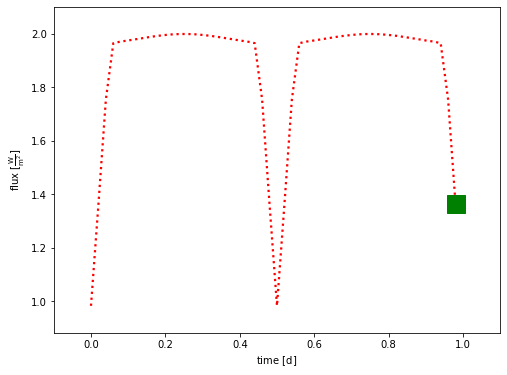

In [10]:
afig, mplanim = b['lc01@model'].plot(times=times[:-1], uncover=True,\
                                     c='r', linestyle=':',\
                                     highlight_marker='s', highlight_color='g',
                                     animate=True, save='animations_3.gif', save_kwargs={'writer': 'imagemagick'})

![animation](animations_3.gif)

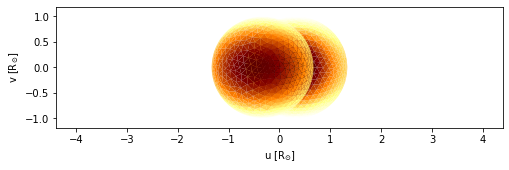

In [11]:
afig, mplanim = b['mesh01@model'].plot(times=times[:-1], fc='teffs', ec='None', 
                       animate=True, save='animations_4.gif', save_kwargs={'writer': 'imagemagick'})

![animation](animations_4.gif)

Disabling Fixed Limits
-------------------------

By default, as can be seen above in the mesh animation, the limits of the axes are automatically set so that they are fixed throughout the animation.

Sometimes this may not be desired.  By setting `xlim='frame'` (and/or `ylim='frame'`), the axes limits are determined automatically per-frame instead of fixed throughout the animation.

For more information and other options see the [autofig tutorial on limits](https://autofig.readthedocs.io/en/1.1.0/tutorials/limits/)

/home/kyle/.local/lib/python3.7/site-packages/phoebe/parameters/parameters.py:3916: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif current_value in ['time', 'times'] and 'residuals' in kwargs.values():
/home/kyle/.local/lib/python3.7/site-packages/phoebe/dependencies/autofig/axes.py:1265: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(xlim)


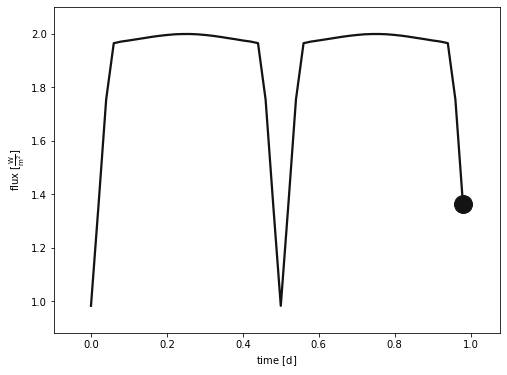

In [12]:
afig, mplanim = b['lc01@model'].plot(times=times[:-1], uncover=True, xlim='frame',
                         animate=True, save='animations_5.gif', save_kwargs={'writer': 'imagemagick'})

![animation](animations_5.gif)

3D axes
------------

Plotting to 3D axes are supported.  In addition to the options for static plots, animations also support passing a list for the range of elevation/azimuth (in degrees) throughout the animation.

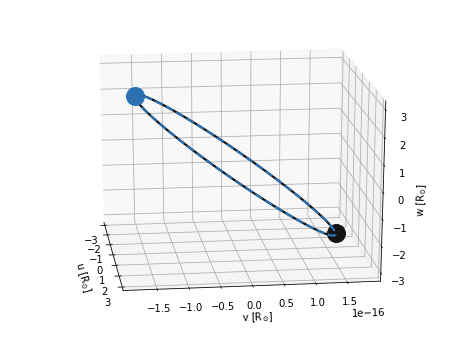

In [13]:
afig, mplanim = b['orb01@model'].plot(times=times[:-1], projection='3d', azim=[0, 360], elev=[-20,20],
                           animate=True, save='animations_6.gif', save_kwargs={'writer': 'imagemagick'})

![animation](animations_6.gif)